- buat asumsi
- tipe data
- sebaran data peubah continous
- plot = x,y,title
- multikolinieritas
- transformasi (log/ln/sqrt/cbrt)
- peubah kategorik 
    - marriage  : kategorik 3 (mengganggu,disederhanakan/masukkan ke yang dominan)
    - education : kateogiri 4 (mengganggu,disederhanakan/masukkan ke yang dominan)
- boxplot (outlier)
- variabel predictor terhadap respons
    - density plot
    - telat bayar - billing (cbrt) 
    - marriage (lainnya) bisa diabaikan

#### data preparation
- billing amount multikol di drop
- marital status yg kecil, digabungkan
- kategorikan data yang tagihan > limit


In [21]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
import math

In [22]:
credit = pd.read_csv('training.csv', sep=',')
credittesting = pd.read_csv('testing.csv',sep=',')

In [23]:
credit.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 10 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [25]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,50720.634827,48815.920662,46471.030556,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,73365.449060,70753.129768,68182.984755,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,3491.000000,2997.000000,2550.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,21943.000000,20987.000000,19954.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,65903.000000,62725.000000,59111.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,746814.000000,646770.000000,693131.000000,1.000000


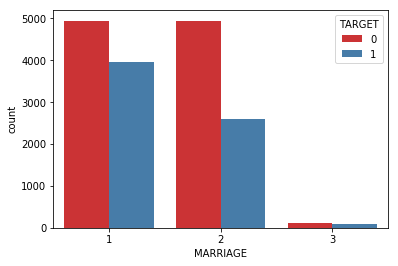

In [26]:
sns.countplot(x="MARRIAGE", hue="TARGET",data=credit, palette='Set1')

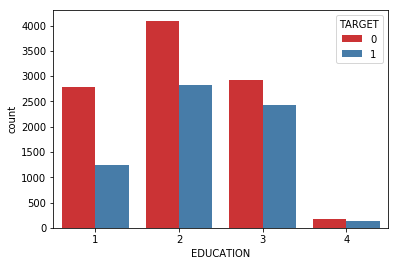

In [27]:
sns.countplot(x="EDUCATION", hue="TARGET",data=credit, palette='Set1')

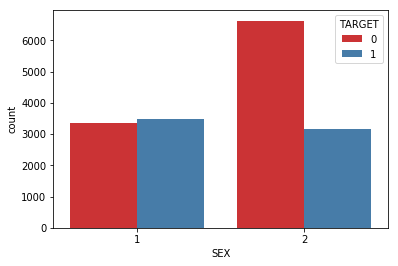

In [28]:
sns.countplot(x="SEX", hue="TARGET",data=credit, palette='Set1')

In [29]:
pd.crosstab(credit['MARRIAGE'],credit['TARGET'],margins=True).style.background_gradient(cmap='Greens')

TARGET,0,1,All
MARRIAGE,,,
1,4945,3956,8901
2,4928,2591,7519
3,116,89,205
All,9989,6636,16625


In [30]:
pd.crosstab(credit['EDUCATION'],credit['TARGET'],margins=True).style.background_gradient(cmap='summer')

TARGET,0,1,All
EDUCATION,,,
1,2792,1237,4029
2,4095,2830,6925
3,2923,2436,5359
4,179,133,312
All,9989,6636,16625


In [31]:
pd.crosstab(credit['SEX'],credit['TARGET'],margins=True).style.background_gradient(cmap='summer_r')

TARGET,0,1,All
SEX,,,
1,3364,3473,6837
2,6625,3163,9788
All,9989,6636,16625


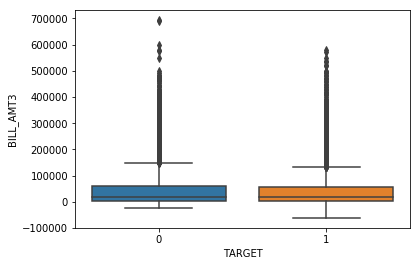

In [32]:
sns.boxplot(y="BILL_AMT3", x="TARGET", data=credit)

Logistic Regression
#### TRAIN TEST SPLIT

In [33]:
credit1 = pd.get_dummies(credit, columns = ['MARRIAGE', 'EDUCATION','SEX'], drop_first=True)

In [34]:
X = credit1.drop(['ID','TARGET'],1)
Y = credit1['TARGET']
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=123) 

#### Logistic Regression Modeling

In [35]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X, train_y)
logregpred = logreg.predict(test_X)

#### Summary

In [36]:
print('Intercept: \n', logreg.intercept_)
coef = pd.concat([pd.DataFrame(X.columns),
                 pd.DataFrame(np.transpose(logreg.coef_))],
                 axis=1)
coef

Intercept: 
 [3.17102244e-05]


,0,0
0,LIMIT_BAL,-4.668152e-06
1,AGE,9.333653e-03
2,BILL_AMT1,-2.488037e-06
3,BILL_AMT2,8.406160e-07
4,BILL_AMT3,1.434783e-06
5,MARRIAGE_2,-1.579935e-04
6,MARRIAGE_3,3.252801e-09
7,EDUCATION_2,2.190826e-05
8,EDUCATION_3,1.581840e-04
9,EDUCATION_4,5.500223e-06


#### Confusion Matrix

In [38]:
math.exp(9.333653e-03)

1.0093773473760743

#### peluang perbandingan telat membayar atau tidak telat bayar, jika umurnya bertambah 1 tahun adalah 1,0093 kali dibandingkan jika umurnya tetap dan peubah lain tetap

In [39]:
cm = confusion_matrix(test_y,logregpred)

total = sum(sum(cm))
accuracy    = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
#precision   = cm[1,1] / (cm[0,1] + cm[1,1])

print('Confusion Matrix : \n', cm)
print('Accuracy :',accuracy)
print('Sensitivity :', sensitivity)
print('Specificity :', specificity)
#print('precision   :', precision)

Confusion Matrix : 
 [[1463  589]
 [ 631  642]]
Accuracy : 0.6330827067669172
Sensitivity : 0.5043205027494109
Specificity : 0.7129629629629629


### DECISION TREE

In [104]:
decisiontree = DecisionTreeClassifier(random_state=123, min_samples_split=1000, min_samples_leaf=70)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(test_X)

# test_X amatan baru
# prediksi train_X, dimana train_X data-data yang digunakan untuk membuat model
# cek perbedaan train_Y dengan dtpred

### Confusion Matrix

In [49]:
cm1 = confusion_matrix(test_y, dtpred)

total1 = sum(sum(cm1))
accuracy1   = (cm1[0,0] + cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy :',accuracy1)
print('Sensitivity :', sensitivity1)
print('Specificity :', specificity1)

Confusion Matrix : 
 [[6680 1257]
 [1216 4147]]
Accuracy : 0.8140601503759398
Sensitivity : 0.7732612343837404
Specificity : 0.8416278190752173


In [42]:
train_X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2
9927,80000.0,57,78009.0,78616.0,49662.0,1,0,0,0,0,1
5964,380000.0,40,106065.0,97979.0,100599.0,0,0,0,1,0,0
3874,50000.0,39,47479.0,49344.0,19596.0,1,0,0,0,0,0
9173,290000.0,47,83607.0,83618.0,86768.0,1,0,0,1,0,0
388,130000.0,36,0.0,0.0,0.0,0,0,0,0,0,1


- regresi logistik cocok untuk trend nyamonoton naik, atau monoton turun
- kondisi plot density tidak sesuai dengan regresi logistik, sehingga accuracy yang dihasilkan oleh decision tree lebih besar dibandingkan dengan regresi logistik


In [43]:
features=train_X.columns
export_graphviz(decisiontree, out_file='D:/dt.txt',
                feature_names=features,class_names=["0","1"])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
# www.webgraphviz.com

model 80% baik dengan decision tree
melakukan feature engineering
membuat variabel baru
akurasi naik 1% tidak masalah
sampai ke tahap prescription
testing, mendapatkan probabilitynya,urutkan
siapa 500 orang yang diingatkan untuk tidak terlambat bayar

- peluang perbandingan telat membayar atau tidak telat bayar, jika umurnya bertambah 1 tahun adalah 1,0093 kali dibandingkan jika umurnya tetap dan peubah lain tetap
- overfitting, hanya baik jika digunakan untuk memprediksi dirinya sendiri(amatan2 untuk model), tetapi tidak baik jika digunakan untuk memprediksi amatan baru

In [62]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X, train_y)
logregpred = logreg.predict(train_X)

In [63]:
cm = confusion_matrix(train_y,logregpred)

total = sum(sum(cm))
accuracy    = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
#precision   = cm[1,1] / (cm[0,1] + cm[1,1])

print('Confusion Matrix : \n', cm)
print('Accuracy :',accuracy)
print('Sensitivity :', sensitivity)
print('Specificity :', specificity)
#print('precision   :', precision)

Confusion Matrix : 
 [[5588 2349]
 [2624 2739]]
Accuracy : 0.6260902255639098
Sensitivity : 0.5107216110385978
Specificity : 0.7040443492503464


In [70]:
decisiontree = DecisionTreeClassifier(random_state=123)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(train_X)

In [71]:
cm1 = confusion_matrix(train_y, dtpred)

total1 = sum(sum(cm1))
accuracy1   = (cm1[0,0] + cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy :',accuracy1)
print('Sensitivity :', sensitivity1)
print('Specificity :', specificity1)

Confusion Matrix : 
 [[7936    1]
 [   8 5355]]
Accuracy : 0.9993233082706767
Sensitivity : 0.9985082975946299
Specificity : 0.9998740078115157


In [72]:
decisiontree = DecisionTreeClassifier(random_state=123)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(test_X)

In [73]:
cm1 = confusion_matrix(test_y, dtpred)

total1 = sum(sum(cm1))
accuracy1   = (cm1[0,0] + cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy :',accuracy1)
print('Sensitivity :', sensitivity1)
print('Specificity :', specificity1)

Confusion Matrix : 
 [[1716  336]
 [ 292  981]]
Accuracy : 0.8111278195488721
Sensitivity : 0.7706205813040062
Specificity : 0.8362573099415205


In [90]:
decisiontree = DecisionTreeClassifier(random_state=123,min_samples_split=3000, min_samples_leaf=100)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(train_X)

In [91]:
cm1 = confusion_matrix(train_y, dtpred)

total1 = sum(sum(cm1))
accuracy1   = (cm1[0,0] + cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy :',accuracy1)
print('Sensitivity :', sensitivity1)
print('Specificity :', specificity1)

Confusion Matrix : 
 [[6276 1661]
 [1249 4114]]
Accuracy : 0.781203007518797
Sensitivity : 0.7671079619615887
Specificity : 0.7907269749275545


In [92]:
decisiontree = DecisionTreeClassifier(random_state=123,min_samples_split=3000, min_samples_leaf=100)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(test_X)

In [93]:
cm1 = confusion_matrix(test_y, dtpred)

total1 = sum(sum(cm1))
accuracy1   = (cm1[0,0] + cm1[1,1]) / total1
sensitivity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
specificity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy :',accuracy1)
print('Sensitivity :', sensitivity1)
print('Specificity :', specificity1)

Confusion Matrix : 
 [[1615  437]
 [ 326  947]]
Accuracy : 0.7705263157894737
Sensitivity : 0.7439120188531029
Specificity : 0.7870370370370371


### IMPLEMENTATION
#### One Hot Encoder

In [96]:
kredittesting = pd.get_dummies(credittesting, columns=['MARRIAGE','EDUCATION','SEX'],drop_first=True)

#### Decision Tree Modeling

In [97]:
Xtesting = kredittesting.drop('ID',1)

In [111]:
dtpred = decisiontree.predict_proba(Xtesting)
dtpred = pd.DataFrame(dtpred)
dtpred.columns=['Prob0','Prob1']
dtpred.head(5)
# probability terjadinya y=0, 
# karena prob0 > prob1, hasil kelas=0

,Prob0,Prob1
0,0.919283,0.080717
1,0.919283,0.080717
2,0.919283,0.080717
3,0.919283,0.080717
4,0.996967,0.003033


peluang 0 lebih besar dari prob 1, maka diperoleh class bernilai 0

#### Data Prediction

In [113]:
dtpred1 = decisiontree.predict(Xtesting)
dtpred1 = pd.DataFrame(dtpred1)
dtpred1.columns=['Class']
dtpred1.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Data Outlook

In [107]:
myprediction = pd.concat([credittesting,dtpred,dtpred1],axis=1)
myprediction.head(5)

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,Prob0,Prob1,Class
0,1,30000.0,1,1,2,40,24430.0,23881.0,24234.0,0.919283,0.080717,0
1,2,20000.0,1,1,2,41,16474.0,17203.0,18411.0,0.919283,0.080717,0
2,3,20000.0,1,1,2,36,18600.0,17947.0,18758.0,0.919283,0.080717,0
3,4,20000.0,1,1,2,35,2948.0,3372.0,0.0,0.919283,0.080717,0
4,5,170000.0,1,1,2,38,145196.0,110163.0,112157.0,0.996967,0.003033,0


#### Save to CSV

In [109]:
myprediction.to_csv('D:/myprediction.csv',index=False,header=True)